In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
df = pd.read_pickle('../data/merged_training.pkl')
df.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [37]:
df.reset_index(drop=True, inplace=True)

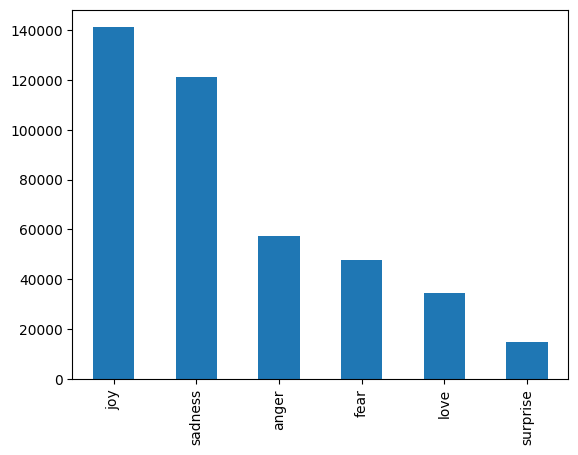

In [120]:
df['emotions'].value_counts().plot(kind='bar');

In [38]:
# get unique tweets
df['text'].nunique()

393822

In [39]:
# Their is duplicated tweets so drop duplicated tweets
df.drop_duplicates(inplace=True)

### Split the dataset

In [40]:
# features
X = df['text']
# target
y = df['emotions']

train_dataset, tdataset, train_labels, tlabels= train_test_split(X, y, test_size=0.3, random_state=42)
val_dataset, test_dataset, val_labels, test_labels = train_test_split(tdataset, tlabels, test_size=.4, random_state=42)

In [41]:
train_datasets = train_dataset.to_list()
val_datasets = val_dataset.to_list()
test_datasets = test_dataset.to_list()

### Tokenizer

In [42]:
# parameters
vocab_size = 10000
max_length = 100
oov_token = '<OOV>'
padding_type = 'post'
trunc_type = 'post'

# Instiantiate the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_datasets)

# get word index.
word_index = tokenizer.word_index

# generate and pad the sequences for training dataset.
sequences = tokenizer.texts_to_sequences(train_datasets)
train_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# generate and padded the sequences for validation dataset.
val_sequences = tokenizer.texts_to_sequences(val_datasets)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# generate and padded the sequences for testing dataset.
test_sequences = tokenizer.texts_to_sequences(test_datasets)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Build the model

In [43]:
embedding_dim = 16


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    # tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# model summary
model.summary()

2023-06-26 15:59:45.104734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-26 15:59:45.107048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-26 15:59:45.108636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 100, 64)          12544     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 100, 6)            390       
                                                                 
Total params: 172,934
Trainable params: 172,934
Non-trainable params: 0
_________________________________________________________________


2023-06-26 15:59:45.350641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-26 15:59:45.353008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-26 15:59:45.354616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [44]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
ohe = OneHotEncoder(use_cat_names=True)
# ohe = LabelEncoder()
train_labels_encoded = ohe.fit_transform(train_labels)
val_labels_encoded = ohe.fit_transform(val_labels)

In [46]:
train_labels = np.array(train_labels_encoded)
val_labels = np.array(val_labels_encoded)

In [47]:
# fit the model
history = model.fit(
    train_padded,
    train_labels,
    epochs=5,
    validation_data=(val_padded, val_labels)
)

Epoch 1/5


2023-06-26 15:59:56.297307: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116514400 exceeds 10% of free system memory.
2023-06-26 15:59:57.384558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-26 15:59:57.387394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-26 15:59:57.389112: I tensorflow/core/common_runtime/executor.cc:1197] [/dev

ValueError: in user code:

    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/lemi/tf_env/lib/python3.8/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 6) and (None, 100, 6) are incompatible


### Plot

In [45]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history(f'val_{string}'))
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, f'val_{string}'])
    plt.show

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")